In [2]:
import nbimporter
import Functions as fun
import os
import numpy as np
import Mors as mors
import matplotlib.pyplot as plt
from collections import defaultdict
import scipy.integrate as integrate
import pandas as pd
from scipy.optimize import curve_fit
import scipy.interpolate as interp

#test array of stars
ages = np.linspace(50,5000,10000) #age array
#empty array of loaded stars
stars = []
for i,star in enumerate(sorted(os.listdir('rp50'))):
    file_path = os.path.join('rp50', star)
    stars.append(mors.Load(file_path))
data = pd.read_csv('RefinedCHZ_data.csv')

In [25]:
updated_data = pd.DataFrame(columns=['Mass','CHZ'])
updated_data['Mass'] = np.arange(0.3,1.01,0.01)
updated_data['CHZ'] = chz
updated_data.to_csv('updated.csv')

In [32]:
#ages, masses, stars, and chz loaded for tests
ages = np.linspace(50,5000,10000)
data = pd.read_csv('updated.csv')
masses,chz = data['Mass'],data['CHZ']
stars = []
for i,star in enumerate(sorted(os.listdir('rp50'))):
    file_path = os.path.join('rp50', star)
    stars.append(mors.Load(file_path))

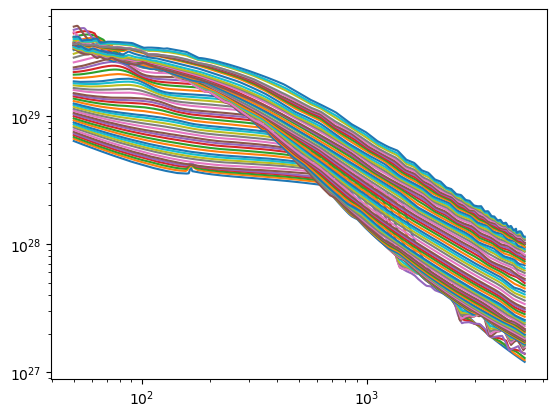

In [28]:
#test LxTrack()
for track in fun.LxTrack(ages,stars).values():
    plt.plot(ages,track)
    plt.xscale('log')
    plt.yscale('log')

#WORKING

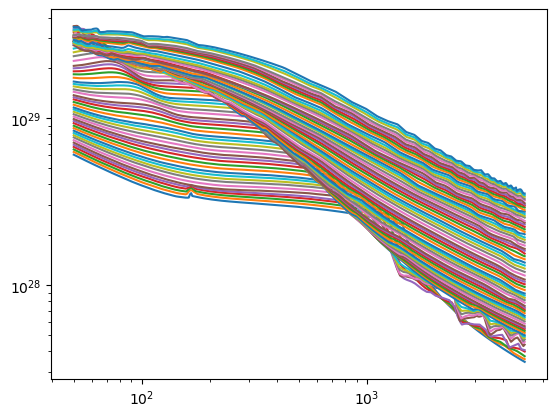

In [29]:
#test LeuvTrack():
for track in fun.LeuvTrack(ages,stars).values():
    plt.plot(ages,track)
    plt.xscale('log')
    plt.yscale('log')

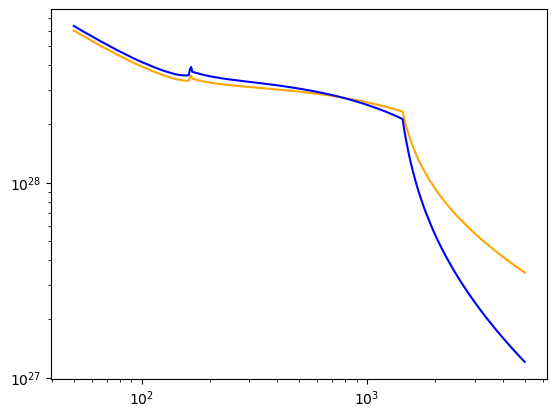

In [30]:
#Comparing Leuv and Lx tracks
track = list(fun.LeuvTrack(ages,stars).values())[0]
plt.plot(ages,track,color='orange')
plt.xscale('log')
plt.yscale('log')

track2 = list(fun.LxTrack(ages,stars).values())[0]
plt.plot(ages,track2,color='blue')


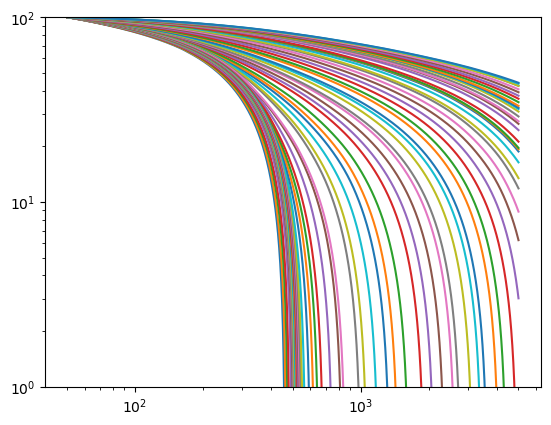

In [33]:
#test massLost
mlr = fun.massLost(ages,stars,0.3,0.5,1,chz)
for array in mlr:
    plt.plot(ages[1:],array)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1,100)
#WORKING

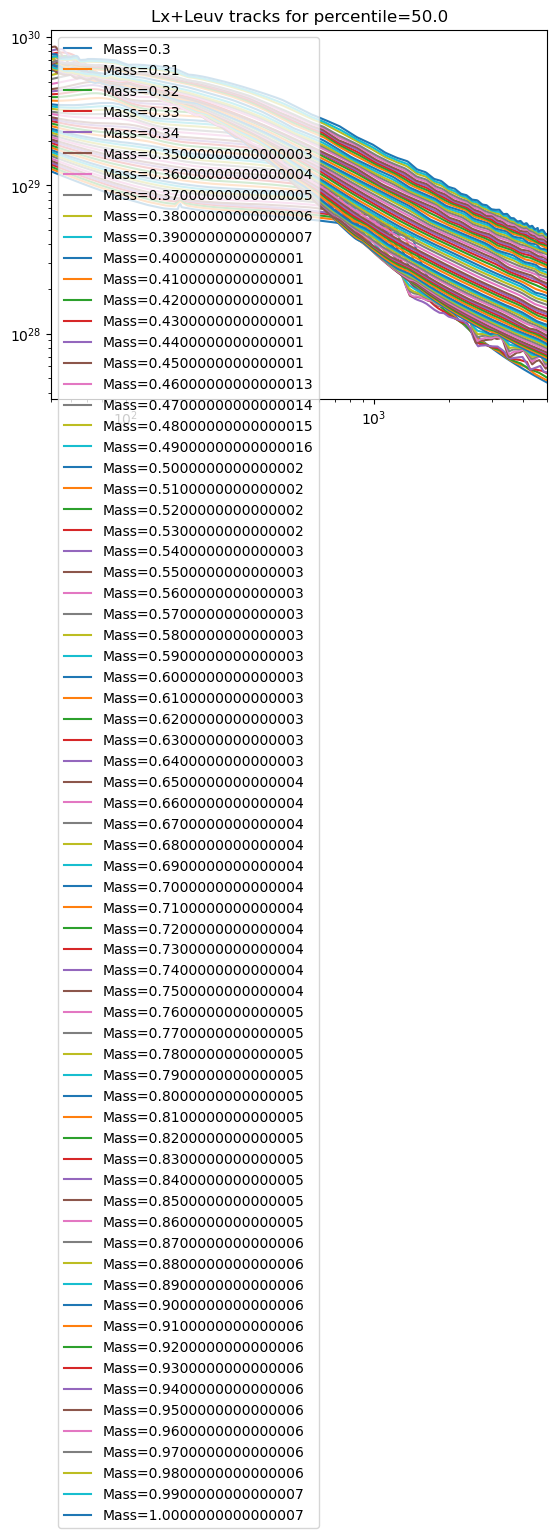

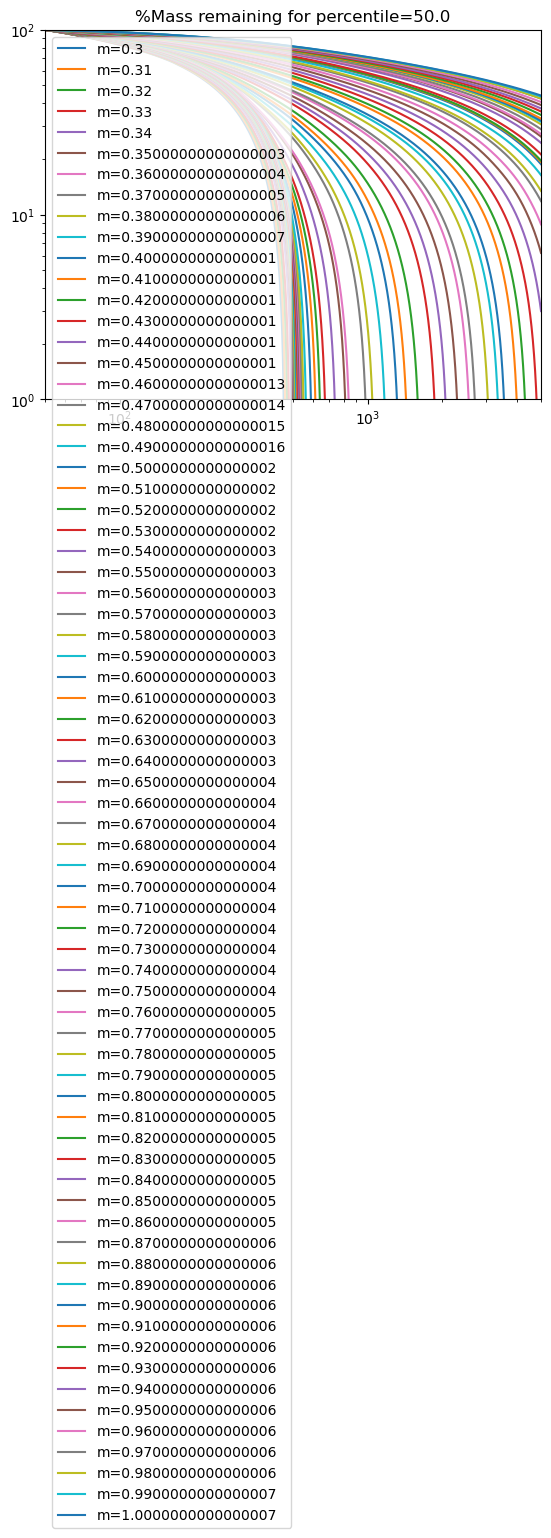

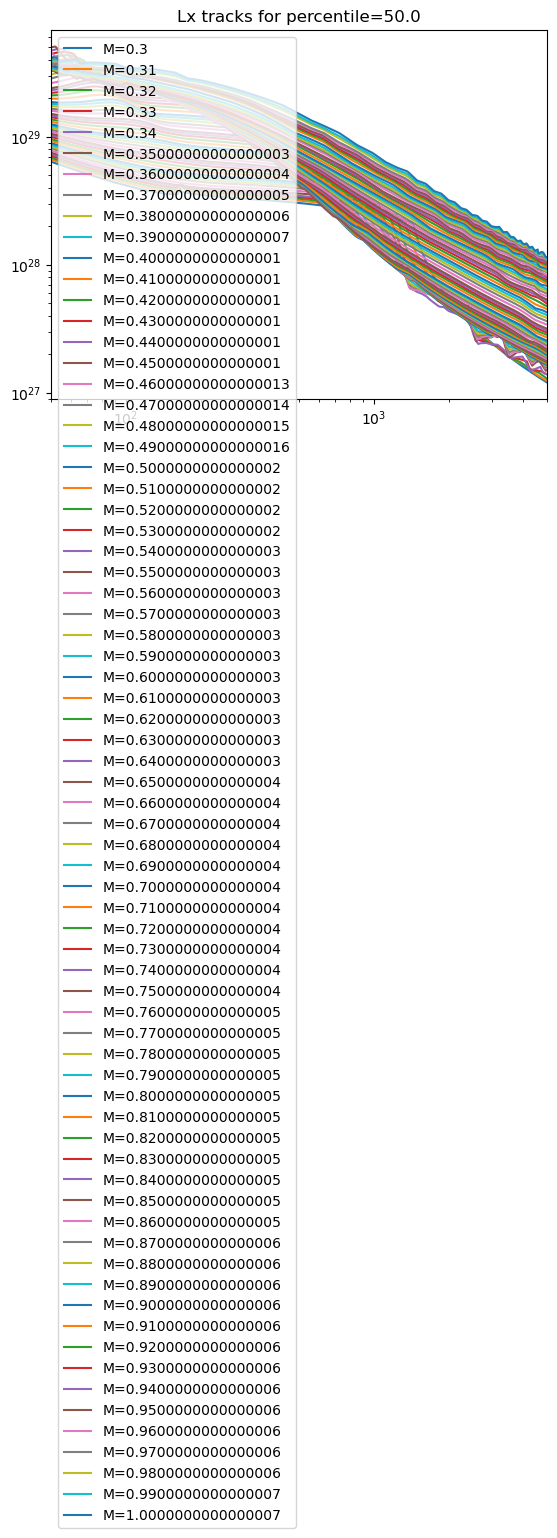

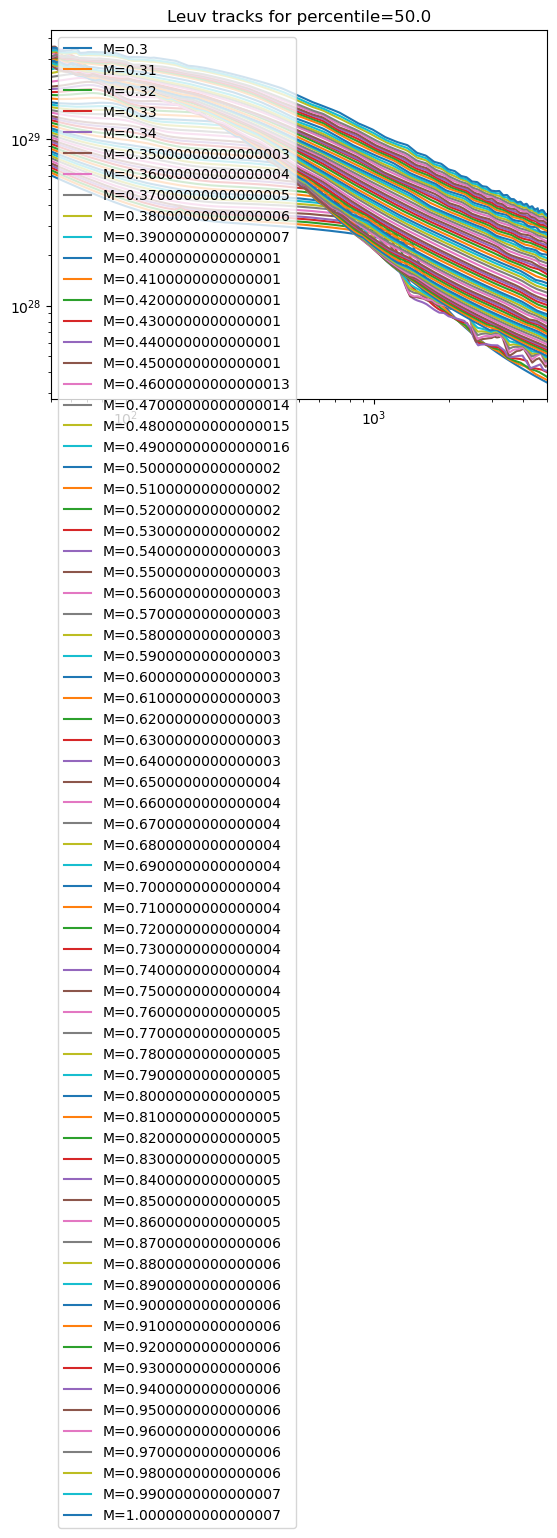

In [34]:
#testing plotByMass
fun.plotByMass(ages,stars,efficiency=0.3,Mpl=0.5,Rpl=1.0,chz=data['CHZ'],R_atm=1.1,M_atm=5E-3,plotMassRem=True,plotLxTrack=True,plotLeuvTrack=True)
#WORKING

In [10]:
perc_stars = []
perc_stars.append(mors.Load('rp25/p25_m0.3.pickle'))
perc_stars.append(mors.Load('rp50/p50_m0.3.pickle'))
perc_stars.append(mors.Load('rp75/p75_m0.3.pickle'))

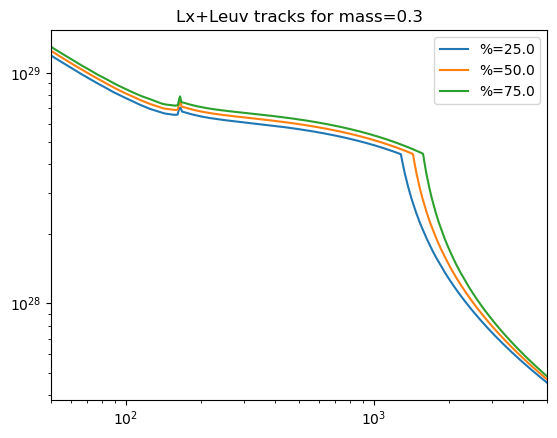

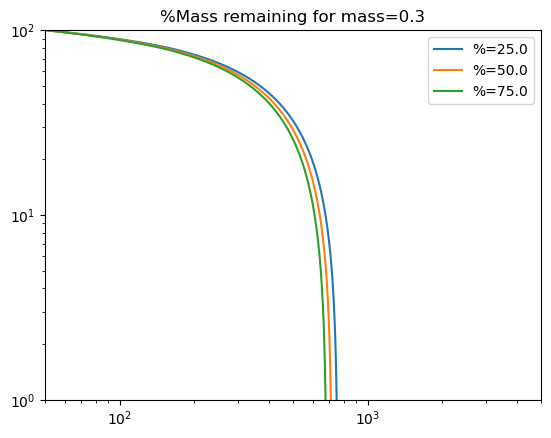

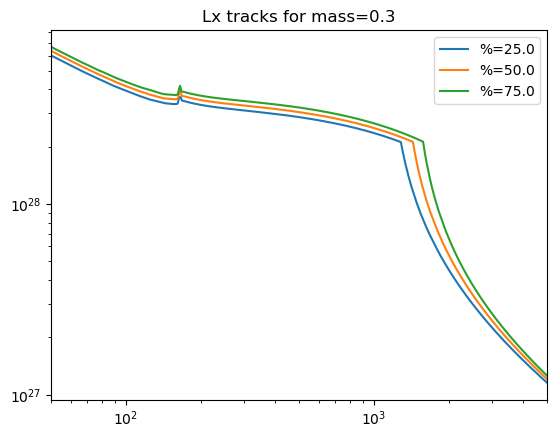

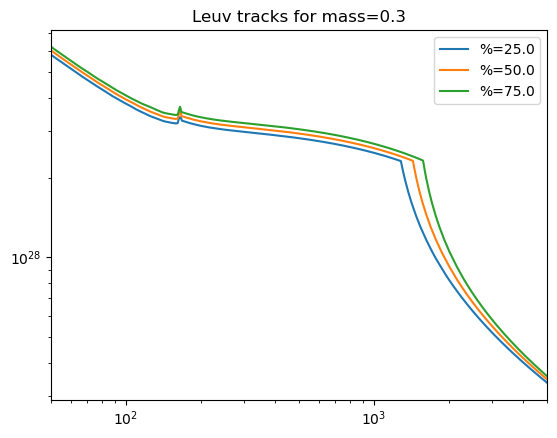

In [11]:
#testing plotByRot
fun.plotByRot(ages,perc_stars,efficiency=0.3,Mpl=0.5,Rpl=1,chz=np.array([data['CHZ'][0]]),R_atm=1.1,M_atm=5E-3,plotMassRem=True,plotLxTrack=True,plotLeuvTrack=True)
#WORKING

In [35]:
#test ageAtLoss()
fun.ageAtLoss(ages,stars,0.3,0.5,1,chz,R_atm=1.1,M_atm=5E-3)
#WORKING

array([ 457.92079208,  464.35643564,  473.26732673,  480.69306931,
        491.58415842,  499.5049505 ,  503.96039604,  504.95049505,
        510.89108911,  514.35643564,  518.31683168,  520.79207921,
        524.25742574,  524.25742574,  527.72277228,  532.67326733,
        537.12871287,  542.57425743,  550.4950495 ,  562.87128713,
        590.0990099 ,  614.85148515,  641.08910891,  671.78217822,
        736.13861386,  810.89108911,  837.62376238,  978.71287129,
       1043.56435644, 1167.82178218, 1311.88118812, 1427.22772277,
       1589.6039604 , 1856.93069307, 2057.42574257, 2292.07920792,
       2552.97029703, 2701.98019802, 3050.4950495 , 3345.04950495,
       3543.06930693, 3986.63366337, 4304.45544554, 4796.03960396,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           

In [20]:
def fourier_series(x, a0, a1, b1, a2, b2):
    return a0 + a1 * np.cos(x) + b1 * np.sin(x) + a2 * np.cos(2*x) + b2 * np.sin(2*x)

In [49]:
def plotContours(ages,stars,efficiency,Mpl,Rpl,chz,R_atm=1.1,M_atm=5E-3, equations=False, levels=[50], algo='mpl2014'):
    '''
    levels should be a list of the levels at which you want the contour line equations. Default is 50.
    '''
    masses = [star.Mstar for star in stars]
    mrem = [np.array(array) for array in fun.massLost(ages,stars,efficiency,Mpl,Rpl,chz,R_atm,M_atm)]
    
    plt.figure(figsize=(8,6))
    plt.contour(ages[1:], masses, mrem, levels=20, cmap='plasma',vmin=0, vmax=100,algorithm=algo)
    plt.colorbar(label='Remaining Atmospheric Mass')
    plt.xlabel("Age (Gyr)")
    plt.ylabel("Stellar Mass ($M_\\odot$)")
    plt.title("Atmospheric Mass Retention Contours with "+str(stars[0].percentile)+"% Rotation")
    plt.xscale('log')
    
    
    if equations:
        
        contour_lines = {}
        contour_set = plt.contour(ages[1:], masses, mrem, levels=levels, cmap='plasma',vmin=0, vmax=100)
        
        contour_paths = contour_set.collections[0].get_paths()
        
        # Store (age, stellar mass) points from the contour
        contour_points = []
        for path in contour_paths:
            contour_points.extend(path.vertices)  # Extract x, y coordinates

        contour_points = np.array(contour_points)
        
        ages_contour = contour_points[:, 0]
        mass_contour = contour_points[:, 1]    

        #parameterize the curve
        path_t = np.linspace(0,1,ages_contour.size)
        r = np.vstack((ages_contour.reshape((1,ages_contour.size)),mass_contour.reshape((1,mass_contour.size))))
        

        # creating the spline object
        spline = interp.interp1d(path_t,r,kind='cubic')

        # defining values of the arbitrary parameter over which
        # you want to interpolate x and y
        # it MUST be within 0 and 1, since you defined
        # the spline between path_t=0 and path_t=1
        t = np.linspace(np.min(path_t),np.max(path_t),100)

        # interpolating along t
        # r[0,:] -> interpolated x coordinates
        # r[1,:] -> interpolated y coordinates
        interpd_r = spline(t)
        '''
        plt.plot(ages_contour,mass_contour,'.',color='red')
        plt.plot(interpd_r[0,:],interpd_r[1,:])
        plt.xlabel('age')
        plt.ylabel('mass')
        plt.show()
        '''
        #plot the residuals
        #Predicted values from the fit
        #mass_pred = interpd_r
        #residuals = mass_contour - mass_pred
        '''
        plt.figure()
        plt.scatter(ages_contour, residuals, color="red", label="Residuals")
        plt.axhline(0, color="black", linestyle="--")  # Reference line
        plt.xlabel("Age (Gyr)")
        plt.ylabel("Residual (Actual - Predicted)")
        plt.title("Residual Plot")
        plt.legend()
        plt.show()
        '''
        return ages_contour,mass_contour


(array([ 234.54565611,  234.65346535,  235.14851485, ..., 3649.00990099,
        3649.5049505 , 3649.92979645]),
 array([0.3       , 0.3004059 , 0.30226229, ..., 0.99988476, 0.99994679,
        1.        ]))

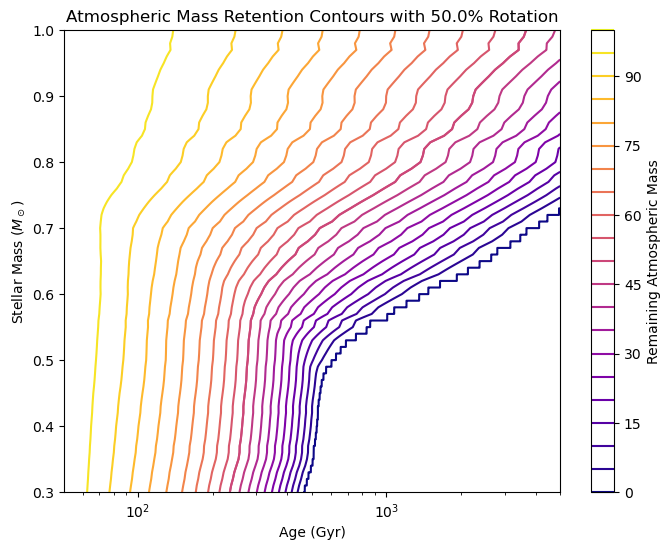

In [50]:
plotContours(ages,stars,0.3,0.5,1,data['CHZ'],R_atm=1.1,M_atm=5E-3, equations=True, levels=[50], algo='mpl2014')